In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [ ]:
df=pd.read_csv("movie.csv")

In [ ]:
#EDA
df.head()



,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
print(df.isnull().sum())

text     0
label    0
dtype: int64


In [ ]:
df['text'].unique()

array(['I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.',
       "When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I

In [ ]:
invalid_count = df[~df['label'].isin([0, 1])].shape[0]
print(f"Number of invalid sentiment values: {invalid_count}")

Number of invalid sentiment values: 0


In [ ]:
df = df[df['label'].isin([0, 1])]
df.reset_index(drop=True, inplace=True)

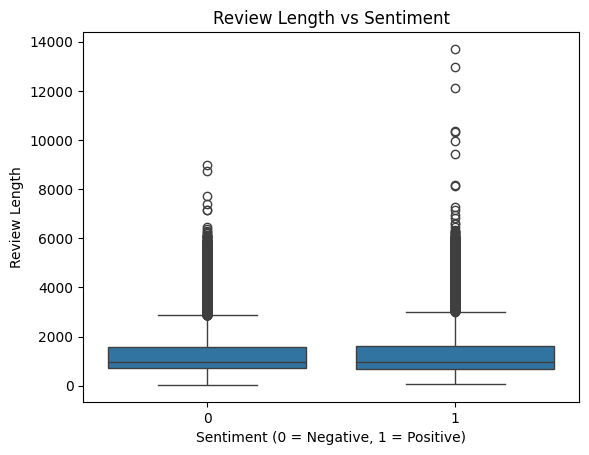

In [ ]:
df['length']=df['text'].apply(len)

sns.boxplot(x='label', y='length', data=df)
plt.title("Review Length vs Sentiment")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Review Length")
plt.show()

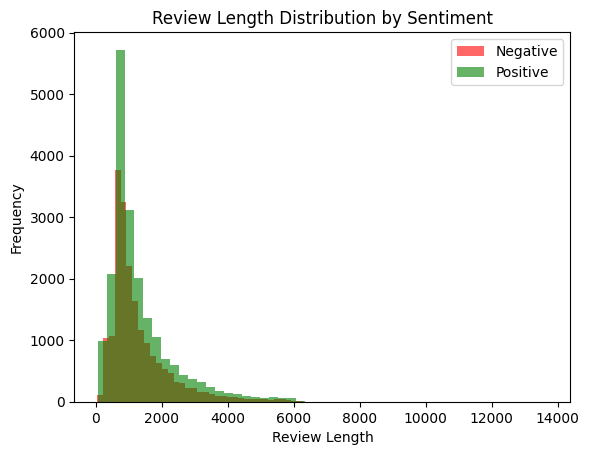

In [ ]:

plt.hist(df[df['label'] == 0]['length'], bins=50, alpha=0.6, label='Negative', color='red')
plt.hist(df[df['label'] == 1]['length'], bins=50, alpha=0.6, label='Positive', color='green')
plt.title("Review Length Distribution by Sentiment")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
# Text Pre-Processing
df['text'] = df['text'].astype(str)
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)      # Remove digits
df['text'] = df['text'].str.strip().str.replace(r'\s+', ' ', regex=True)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)
df['text'] = df['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Corrected lemmatization to return words instead of lists of characters
df['text'] = df['text'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in text.split()]))

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Apply stemming and join the stemmed tokens back into a string
df['text'] = df['text'].apply(lambda tokens: ' '.join([stemmer.stem(word) for word in tokens]))

In [30]:
# Apply preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report # Import classification_report

# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text']).toarray()
y = df['label']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Model Evaluation
print("\nLogistic Regression Metrics:")
print(classification_report(y_test, y_pred))

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Feature Extraction using CountVectorizer
cvectorizer = CountVectorizer(max_features=5000)
X_c = cvectorizer.fit_transform(df['text']).toarray()
y = df['label']

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_c, y, test_size=0.2, random_state=42)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(Xc_train, yc_train)
yc_pred = lr_model.predict(Xc_test)

# Model Evaluation
print("\nLogistic Regression Metrics (CountVectorizer):")
print(classification_report(yc_test, yc_pred))

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(Xc_train, yc_train)
print(model.score(Xc_test, yc_test))

NameError: name 'Xc_train' is not defined

In [ ]:


model = LogisticRegression()
model.fit(Xc_train, yc_train)
print(model.score(Xc_test, yc_test))

In [ ]:
# ROc

from sklearn.metrics import roc_auc_score, roc_curve

y_prob = lr_model.predict_proba(X_test)[:, 1]

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC-AUC Score: {roc_auc:.4f}")



NameError: name 'lr_model' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

NameError: name 'y_test' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


cm = confusion_matrix(y_test, y_pred)

# Print Confusion Matrix
print("Confusion Matrix:")
print(cm)

# Optionally display the matrix as a plot
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

NameError: name 'y_test' is not defined

In [ ]:
from sklearn.metrics import f1_score

# Binary F1 score
f1 = f1_score(y_test, y_pred)
print(f"\nF1 Score: {f1:.4f}")

NameError: name 'y_test' is not defined